# Quick Start
Here are a few examples to get you started using Python, Numpy, and Matplotlib 

## Imports
A good strategy to keep code organized is to import your packages all at the beginning of your file.

In [1]:
import numpy as np 
# this makes np refer to numpy, so you only have to type the two letters rather than five.

import matplotlib.pyplot as plt 
# The shortening of the name is more necessary for this package. 

from numpy.polynomial import polynomial as poly
import time
from tqdm.notebook import tqdm 
# If running in a python .py script (not an .ipynb notebook), use:
# from tqdm import tqdm

## Numpy Basics
The basic datatype for Numpy is a Numpy Array. This is like a vector or a matrix. Here are a few examples:

In [2]:
np.arange(10) # Notice how the indices go from 0 to N-1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
dx = 0.01
xmin, xmax = 0., 1. #adding the decimal forces floting point values
np.linspace(xmin, xmax, num=1+int((xmax-xmin)/dx))

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [4]:
np.random.rand(4,3)

array([[0.46769708, 0.9683692 , 0.36825409],
       [0.78489391, 0.76482999, 0.13609324],
       [0.55680977, 0.76747202, 0.28292125],
       [0.65501087, 0.67815197, 0.67362332]])

## Python and Numpy Can Be Used as a Calculator

In [5]:
for idx in range(1, 11):
    tempvector = np.arange(1,1+idx)
    print(np.sum(tempvector) == idx * (idx + 1) / 2)

True
True
True
True
True
True
True
True
True
True


In [6]:
np.sin(np.pi/2)

1.0

In [7]:
np.exp(np.pi * 1j) # There is a little bit of floating point error

(-1+1.2246467991473532e-16j)

## Plotting
This notebook only discusses Matplotlib, but [Seaborn](https://seaborn.pydata.org/) is also a useful plotting package.

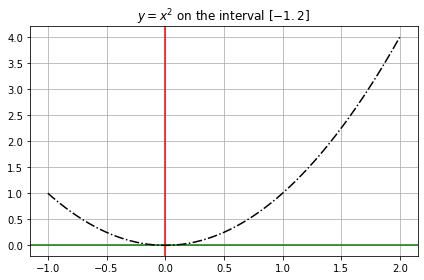

In [8]:
dx = 0.01
xmin, xmax = -1., 2. #adding the decimal forces floting point values
xvec = np.linspace(xmin, xmax, num=1+int((xmax-xmin)/dx))
plt.title(r"$y=x^2$ on the interval $[-1. 2]$")
plt.grid()
plt.axhline(color="g")
plt.axvline(color="r")
plt.plot(xvec, xvec**2, "-.k"); #
# Plot the quadratic curve on the interval with the "dash dot" style and black color
plt.tight_layout()
# plt.savefig("testquadratic.pdf") # Matplotlib looks at the filetype you specify in the filename.

## Polynomials
My personal opinion is that this library is so usefual for math, that it needs its own section here.

Polynomials can be created by specifying either their roots or their coefficients:

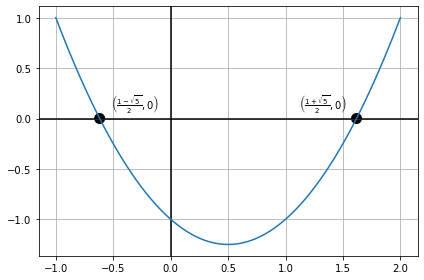

In [9]:
fibcoeffs = (-1, -1, 1)
fibpoly = poly.Polynomial(fibcoeffs)
fibroots = 0.5 + np.array([np.sqrt(5), -np.sqrt(5)]) / 2.
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.plot(xvec, fibpoly(xvec))
plt.scatter(fibroots, np.zeros_like(fibroots), s = (100,100), c = "k")
plt.annotate(r"$\left ( \frac{1 + \sqrt{5}}{2}, 0\right )$", (fibroots[0] - 0.5, 0.1)); 
# Semicolon suppresses text output, like in Matlab
plt.annotate(r"$\left ( \frac{1 - \sqrt{5}}{2}, 0\right )$", (fibroots[1] + 0.1, 0.1)); 
plt.tight_layout()

plt.close(plt.gcf())

numpy.polynomial.polynomial.polyfromroots returns the coefficients for the monic polynomial with the given roots. The Polynomial class supports scalar multiplication.

$$\sin x = x \prod_{n = 1}^{\infty} \left ( 1 - \frac{x^2}{n^2 \pi^2} \right ) \quad \text{(Euler)}$$

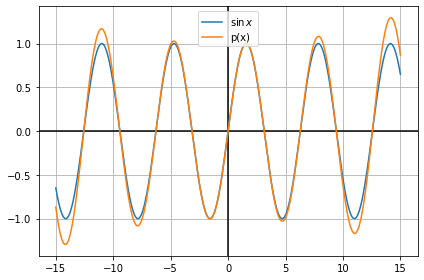

In [10]:
dx = 0.01
xmin, xmax = -15, 15 #adding the decimal forces floting point values
xvec = np.linspace(xmin, xmax, num=1+int((xmax-xmin)/dx))
R = 78
roots = np.pi * np.arange(-R, R +1)
p = poly.Polynomial(poly.polyfromroots(roots)) / np.prod(roots[roots != 0])
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.plot(xvec, np.sin(xvec), label=r"$\sin x$");
plt.plot(xvec, p(xvec), label="p(x)");
plt.legend(loc="upper center");
plt.tight_layout()

In [11]:
plt.close(plt.gcf())

You can also add, subtract, and multiply polynomials (division can also be done but is not as straightforward):

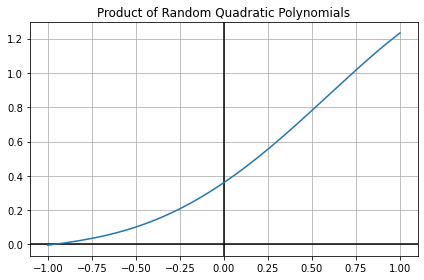

In [12]:
dx = 0.01
xmin, xmax = -1, 1 #adding the decimal forces floting point values
xvec = np.linspace(xmin, xmax, num=1+int((xmax-xmin)/dx))
p1 = poly.Polynomial(2 * np.random.rand(3) - 1)
p2 = poly.Polynomial(2 * np.random.rand(3) - 1)
p3 = p1 * p2 
# Note how we are multiplying the polynomial objects and not the
# floating point results of evaluation of the polynomials.
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.title("Product of Random Quadratic Polynomials")
plt.plot(xvec, p3(xvec));
plt.tight_layout()

In [13]:
plt.close(plt.gcf())

## Array Slicing and Masking
Array slicing and masking allow you to access portions of a numpy array. They are in general very fast operations.

In [14]:
a = np.arange(-100,101)
a[4:30:2]

array([-96, -94, -92, -90, -88, -86, -84, -82, -80, -78, -76, -74, -72])

In [15]:
a[np.abs(a-18)<46 ]

array([-27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
       -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63])

## Passing Functions to other Functions

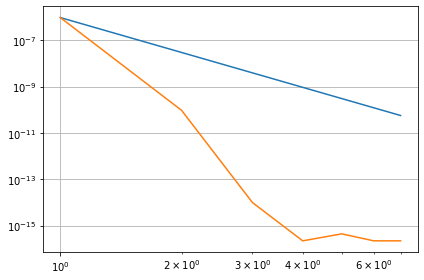

In [16]:
f = np.exp
dtype = np.float64
exps = np.arange(1, 8, dtype=dtype)
def simpson(f, a, b, dt, dtype=dtype): 
    # The first argument of simpson is the function whose
    # integral is to be approximated.
    T = np.linspace(a, b, num = 1 + int((b - a)/dt), dtype=dtype)
    if T.size%2 != 1:
        T = np.linspace(a, b, num = 2 + int((b - a)/dt))
    sum1 = 2 * np.sum(f(T[2:-1:2]))
    sum2 = 4 * np.sum(f(T[1::2]))
    return (f(a) + sum1 + sum2 + f(b)) * dt / 3
results = (np.abs(simpson(f, 0., 1., 10.**(-idx)) -  np.e + 1) for idx in exps)
# This is a generator expression
results = np.fromiter(results, dtype=dtype)
plt.grid()
def asymp(x): return x**-5 # This syntax is preferable to lambda expressions in Python.
plt.loglog(exps, asymp(exps) * results[0] * exps[0]**5);
plt.loglog(exps, results);
plt.tight_layout()

In [17]:
plt.close(plt.gcf())

## Numpy is ***Much*** Faster than Native Python

In [18]:
tic = time.perf_counter()
pythonsum = sum(range(10**9))
toc = time.perf_counter()
print(f"The pure Python sum took {toc - tic:.2f} seconds.") # F-strings are useful.

The pure Python sum took 19.15 seconds.


In [19]:
tic = time.perf_counter()
pythonsum = np.sum(np.arange(10**9))
toc = time.perf_counter()
print(f"The Numpy sum took {toc - tic:.2f} seconds.")

The Numpy sum took 5.41 seconds.


## Loading Bars
Tqdm is an easy way to add loading bars to your for loops.

In [20]:
for i in tqdm(range(100)):
    time.sleep(.05)

  0%|          | 0/100 [00:00<?, ?it/s]